In [ ]:
#import libraries
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.scales import limits

### TASK 1

In [ ]:
#read data
q1data = pd.read_csv('q1data.csv')
q1data

In [ ]:
#I noticed that there are some missing values, so here I am removing them
#drop.na source: https://www.w3schools.com/python/pandas/ref_df_dropna.asp#:~:text=The%20dropna()%20method%20removes,in%20the%20original%20DataFrame%20instead.
q1data_clean = q1data.dropna()
q1data_clean

1.   The aesthetics being used in task 1: it is a bubble map (or a modified scatter plot) with x = income and y = life expectancy, which are both continuous variables. The "fill" categorizes each value based on the world region, or 'four_regions' based on the table column name. The "size" of each data point is based on the population size per country.

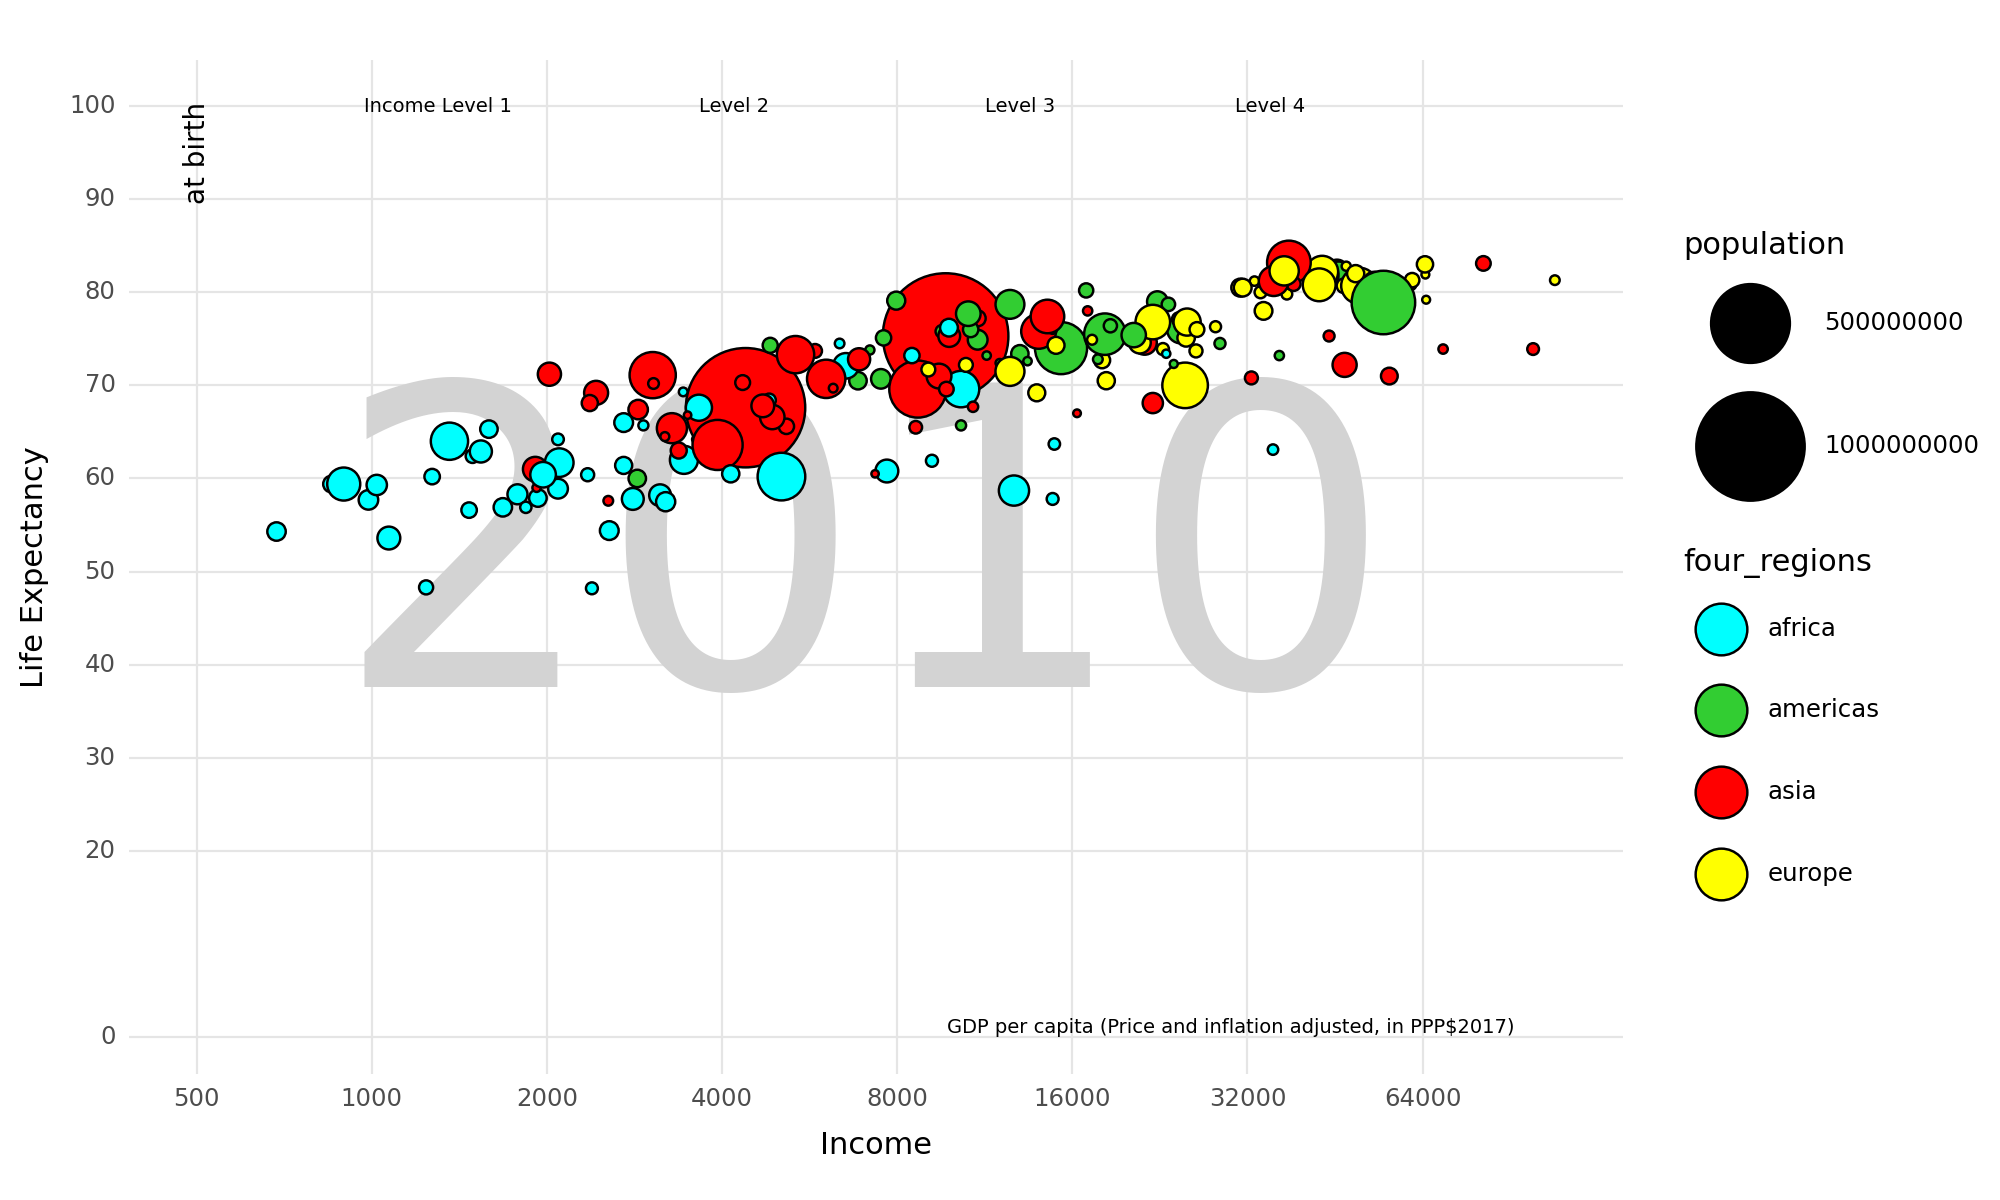

<Figure Size: (1000 x 600)>

In [80]:
#sources: annotate function: https://stackoverflow.com/questions/39602828/changing-background-color-for-a-text-annotation-to-increase-contrast-and-visibil
#sources: https://pwwang.github.io/plotnine-prism/raw/colours/, https://datacarpentry.org/python-ecology-lesson/instructor/07-visualization-ggplot-python.html
#sources: scale_size_continuous(): https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_size_continuous.html
#sources: ChatGPT for theme_minimal() and theme(legend_position = "none")
#sources: https://ggplot2-book.org/themes
(ggplot(q1data_clean, aes(x = "income", y = 'life_exp', fill = "four_regions", size = "population"))
+ annotate('text', x = 7000, y = 50, label = "2010", size = 150, color = 'lightgray')
+ annotate('text', x = 500, y = 95, label = "at birth", size = 10, color = 'black', angle = 90)
+ annotate('text', x = 30000, y = 1, label = "GDP per capita (Price and inflation adjusted, in PPP$2017)", color = 'black', size = 7)
+ annotate('text', x = 1300, y = 100, label = "Income Level 1", color = 'black', size = 7)
+ annotate('text', x = 4200, y = 100, label = "Level 2", color = "black", size = 7)
+ annotate('text', x = 13000, y = 100, label = "Level 3", color = "black", size = 7)
+ annotate('text', x = 35000, y = 100, label = "Level 4", color = "black", size = 7)
+ geom_point()
+ labs(x = "Income", y = "Life Expectancy")
+ scale_x_log10(breaks = (500, 1000, 2000, 4000, 8000, 16000, 32000, 64000))
+ scale_y_continuous(breaks = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
+ scale_size_continuous(range = (1, 25))
+ scale_fill_manual(breaks = ('asia', 'europe', 'africa', 'americas'),
                    values = ('red', 'yellow', 'aqua', 'limegreen'),
                    guide=guide_legend(override_aes={'size': 10}) #from chatgpt
  )
+ theme_minimal()
+ theme(panel_grid_minor = element_blank(),
        figure_size = (10,6),
  )
)

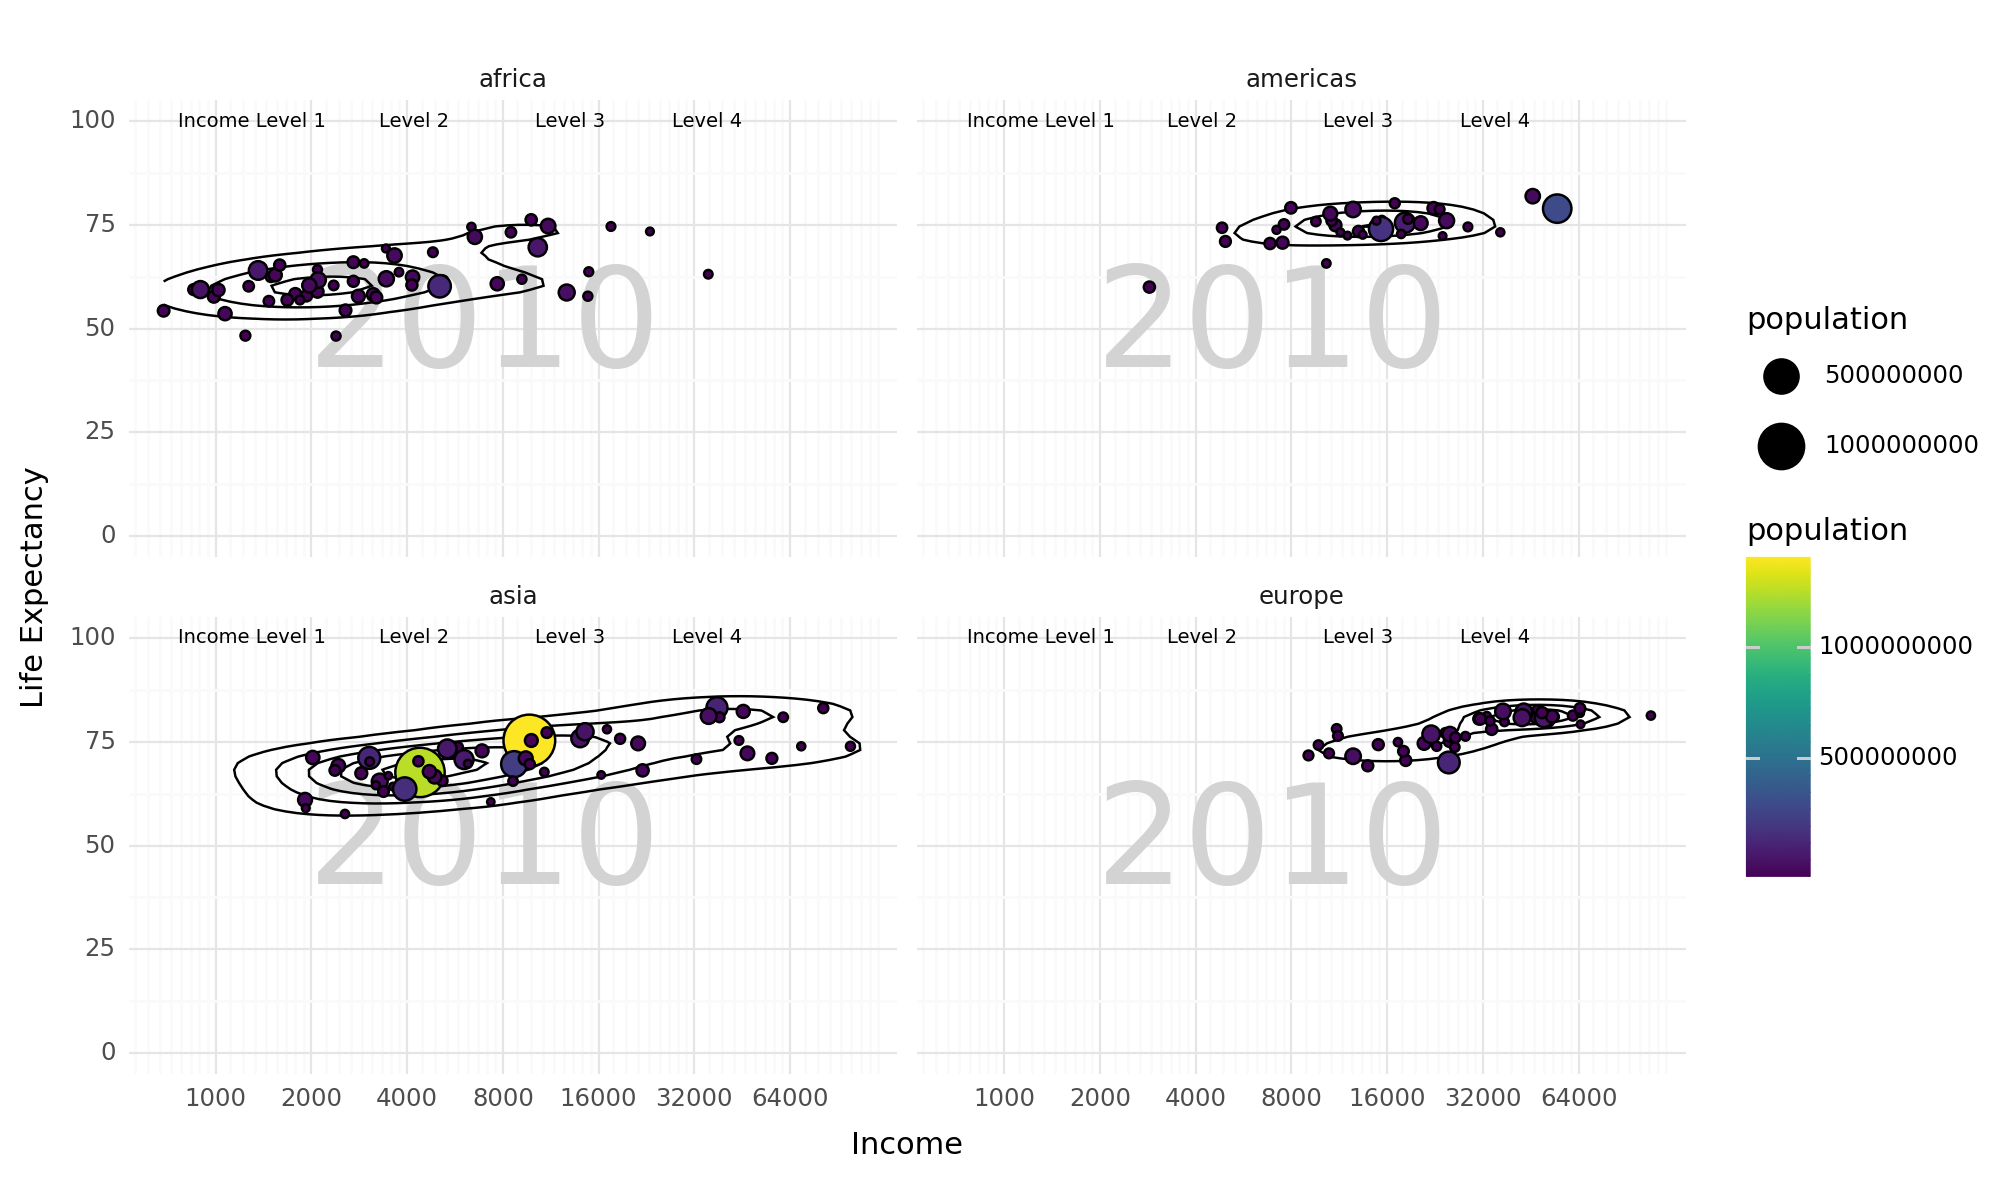

<Figure Size: (1000 x 600)>

In [81]:
#another geometry besides geom_point = 2D Density
#figure size source: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
(ggplot(q1data_clean)
+ annotate('text', x = 7000, y = 50, label = "2010", size = 50, color = 'lightgray')
+ annotate('text', x = 1300, y = 100, label = "Income Level 1", color = 'black', size = 7)
+ annotate('text', x = 4200, y = 100, label = "Level 2", color = "black", size = 7)
+ annotate('text', x = 13000, y = 100, label = "Level 3", color = "black", size = 7)
+ annotate('text', x = 35000, y = 100, label = "Level 4", color = "black", size = 7)
+ geom_density_2d(aes(x = 'income', y = 'life_exp'))
+ geom_point(q1data_clean, aes(x = 'income', y = 'life_exp', size = 'population', fill = 'population'))
+ labs(x = "Income", y = "Life Expectancy")
+ ylim(0, 100)
+ scale_x_log10(breaks = (500, 1000, 2000, 4000, 8000, 16000, 32000, 64000))
+ scale_size_continuous(range = (1, 10))
+ facet_wrap('four_regions')
+ theme_minimal()
+ theme(figure_size = (10,6))
)

The plot above is a 2d density plot and a scatter plot overlayed together. The variables include the same ones as before: income, life expectancy at birth, population, and the world region. It portrays a very similar story to the bubble chart. The areas where densities are highest mean that it is where the majority of countries lie regarding income and life expectancy, and the population size is shown for each country as well. It is very easy to distinguish the difference between each world region since the plot uses facet_wrap to separate them. One downside to this kind of plot is that it is a little harder to compare income and life expectancy per region. It is harder to see how each region differs from each other when they are not in the same plot. In the bubble chart previously, all of the countries were in one plot, and since each country has been color coded to its respective world region, it is very easy to see how each world region differs from each other in terms of their income and life expectancy. With the facet_wrap, each region is separate so it is harder to compare how much different each region is regarding income and life expectancy.

### TASK 2

The variables needed for this graph: x is the exports, y is the imports. It is another bubble map showing each country's relationship between x = exports and y = imports based on which world region they are in and their energy usage. The "fill" will be four_regions, and size will be "energy."

In [82]:
#import q2data
q2data = pd.read_csv('q2data.csv')
q2data

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [83]:
#source: checking data types in pandas df: https://www.tutorialspoint.com/get-the-data-type-of-column-in-pandas-python
q2data.dtypes

imports              float64
exports              float64
energy                object
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [84]:
#removing k from certain values in the energy column, source: ChatGPT

# Identify rows with 'k' in the energy column
rows_with_k = q2data['energy'].str.contains('k', na=False)

# Remove 'k' and convert the column to numeric
q2data['energy'] = q2data['energy'].str.replace('k', '', regex=False).astype(float)

q2data.dtypes #energy is now a float

imports              float64
exports              float64
energy               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [85]:
q2data

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434.0,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241.0,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [86]:
#change values originally with k back into thousands
#source: ChatGPT

# Multiply the values that had 'k' by 1000
q2data.loc[rows_with_k, 'energy'] = q2data.loc[rows_with_k, 'energy'] * 1000

#check data
q2data



,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434.0,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340.0,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241.0,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617.0,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


/usr/local/lib/python3.10/dist-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


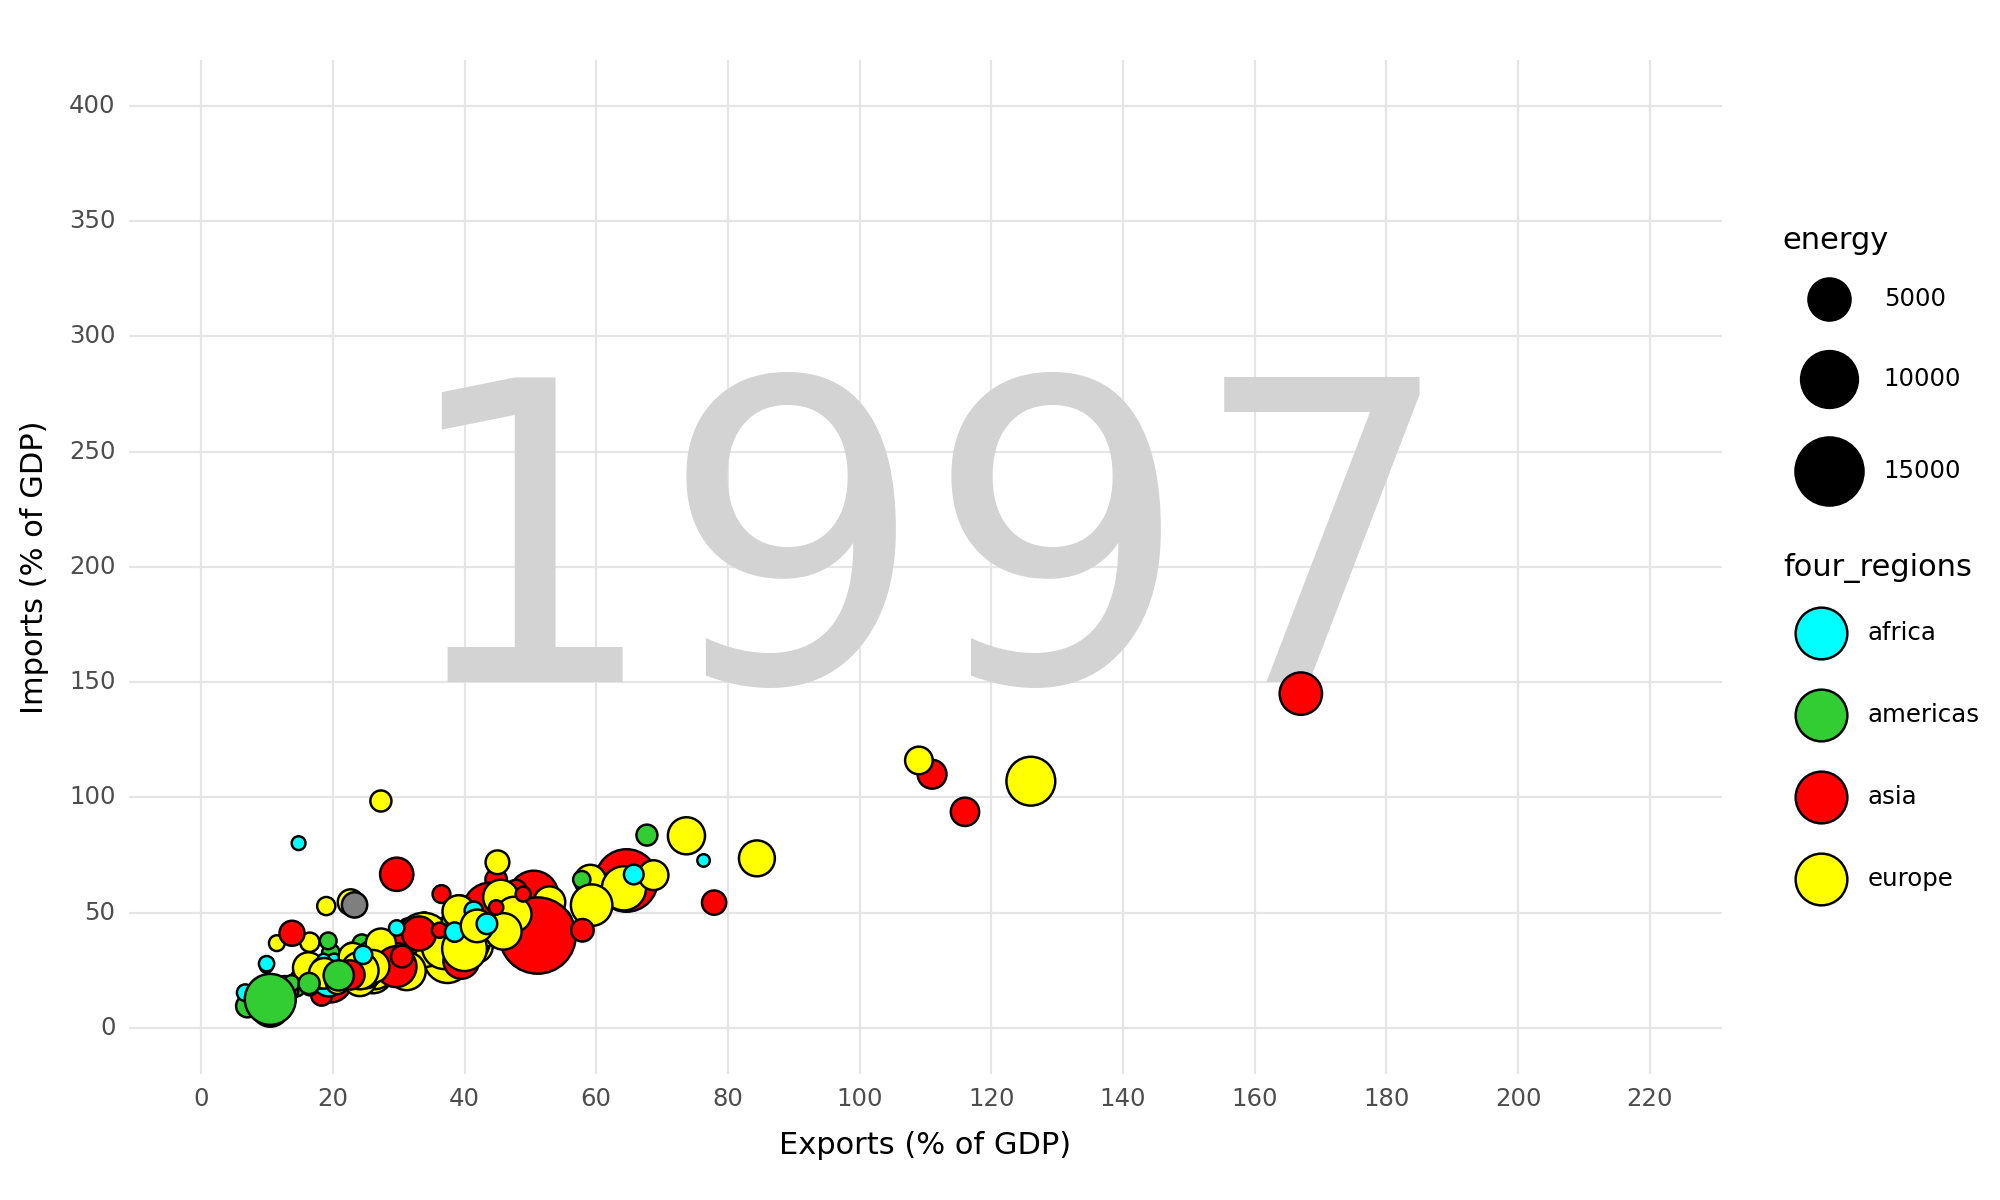

<Figure Size: (1000 x 600)>

In [87]:
#source for scale_x_continuous(limits = []): ChatGPT
(ggplot(q2data, aes(x = "exports", y = 'imports', fill = "four_regions", size = 'energy'))
+ annotate('text', x = 110, y = 200, label = "1997", size = 150, color = 'lightgray')
+ ylim(0, 400)
+ geom_point()
+ labs(x = "Exports (% of GDP)", y = "Imports (% of GDP)")
+ scale_size_continuous(range = (1, 15))
+ scale_fill_manual(breaks = ('asia', 'europe', 'africa', 'americas'), values = ('red', 'yellow', 'aqua', 'limegreen'), guide=guide_legend(override_aes={'size': 10}))
+ scale_x_continuous(breaks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220], limits = [0, 220])
+ scale_y_continuous(breaks = [0, 50, 100, 150, 200, 250, 300, 350, 400], limits = [0, 400])
+ theme_minimal()
+ theme(panel_grid_minor = element_blank(),
        figure_size = (10,6)
  )
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density_2d : Removed 35 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


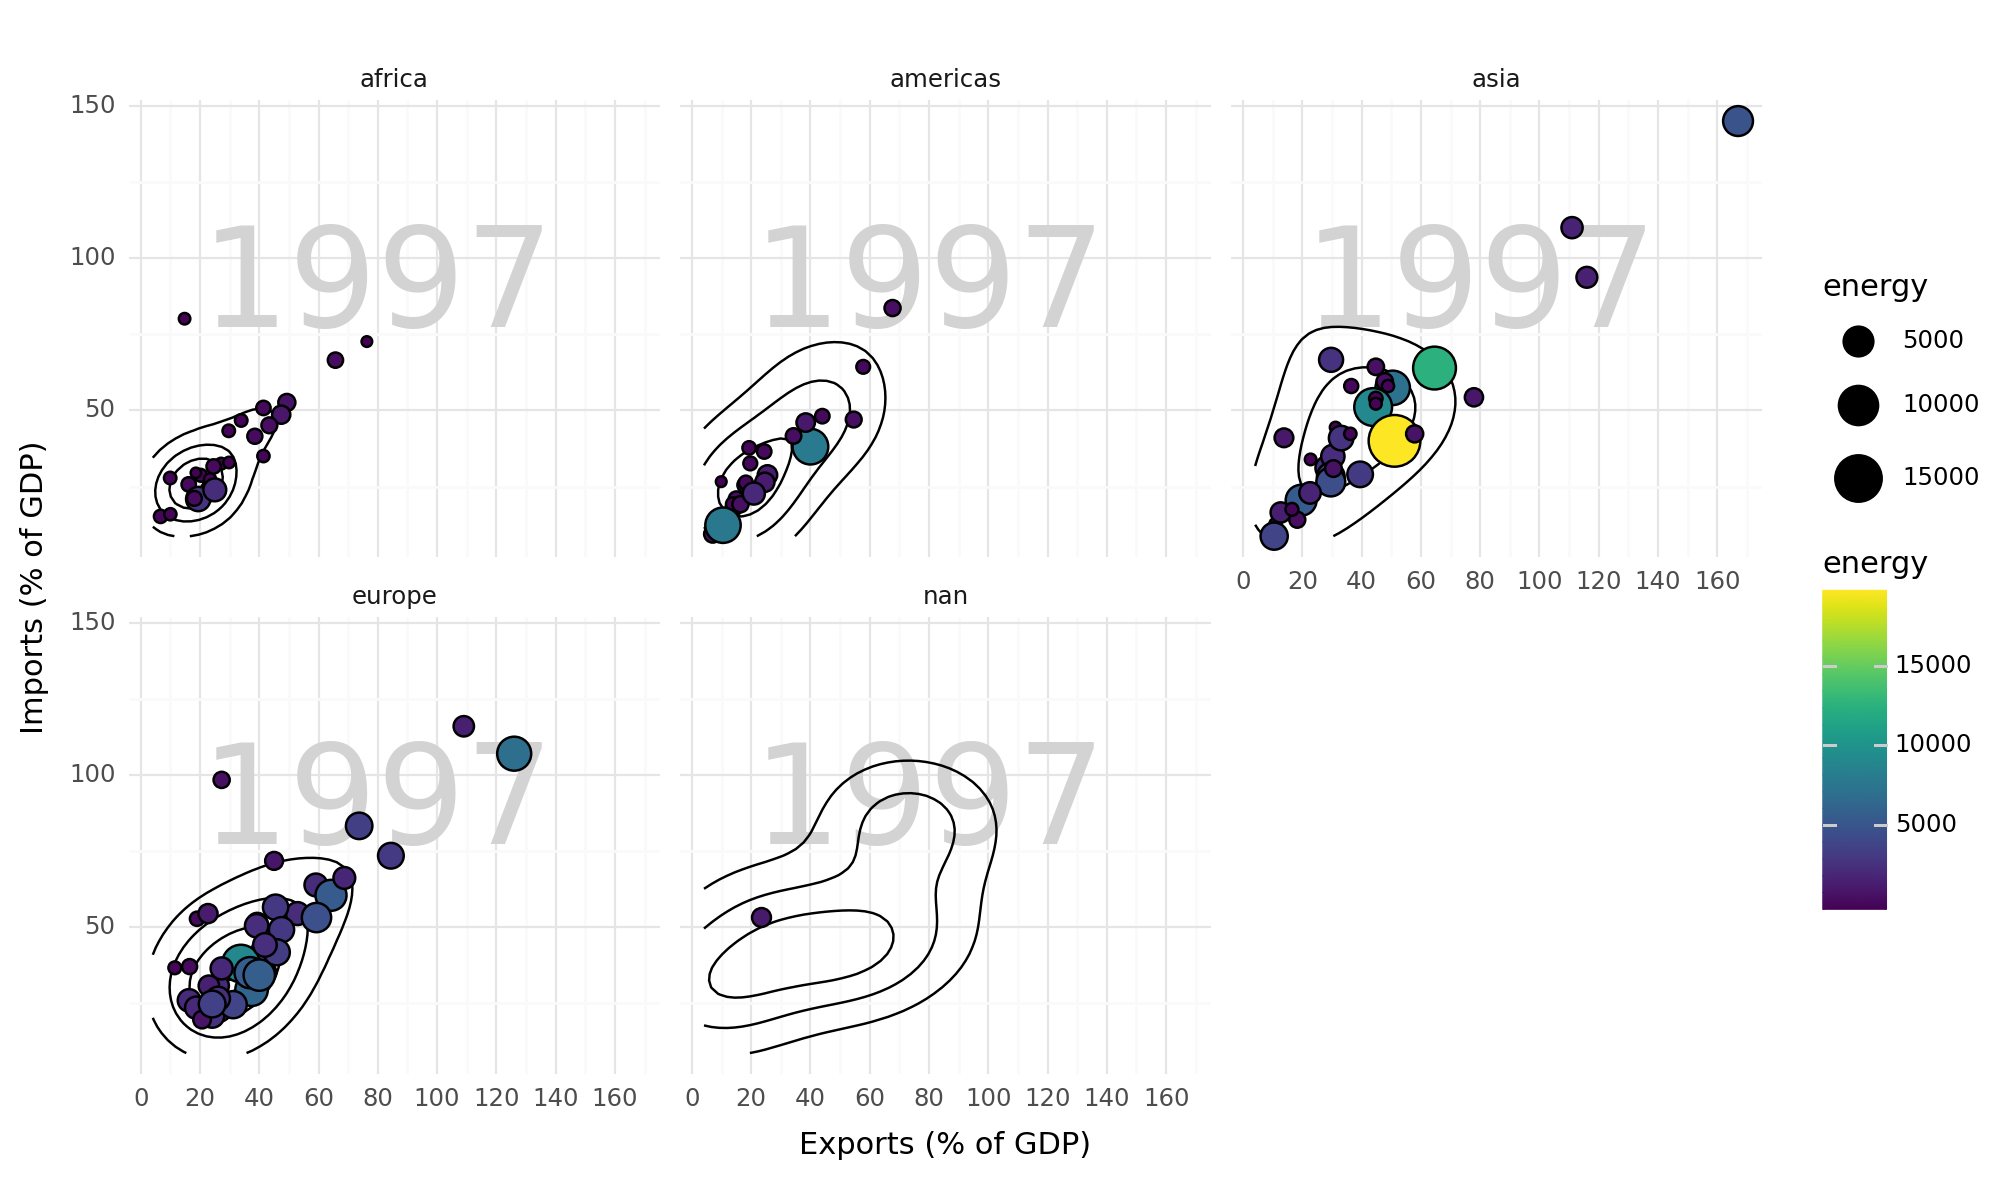

<Figure Size: (1000 x 600)>

In [88]:
#another geometry besides geom_point = 2D Density
#figure size source: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
(ggplot(q2data)
+ annotate('text', x = 80, y = 90, label = "1997", size = 50, color = 'lightgray')
+ geom_density_2d(aes(x = 'exports', y = 'imports'))
+ geom_point(q2data, aes(x = 'exports', y = 'imports', size = 'energy', fill = 'energy'))
+ labs(x = "Exports (% of GDP)", y = "Imports (% of GDP)")
+ scale_x_continuous(breaks = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
+ scale_size_continuous(range = (1, 10))
+ facet_wrap('four_regions')
+ theme_minimal()
+ theme(figure_size = (10,6))
)

Above is a 2d density plot of exports and imports per country per world region, and it is overlayed with a scatter plot where it shows energy consumption per country. The 2d density plot shows the  concentration of countries in a given export and import relationship, and the size of the dots measure energy consumption. The closer to get to the "bulls-eye" of the 2d density plot, the more countries there are with the given export/import relationship. With the facet wrapping for world regions, it is easier to see the difference in the relationship between exports and imports per world region. In the African countries, it is easier to see that they tend to have lower exports and imports percentages, and these countries consume the least amount of energy. However in the European countries, they have a slightly larger concentration of countries with higher exports and imports, and it is easier to see that these European countries consume more energy than the African countries. In the bubble map previously, all of the countries' data points were on top of each other, making it hard to see how each world region compares to each other.

### TASK 3

In [89]:
q3data = pd.read_csv('q3data.csv')
q3data

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


The aesthetics being used are x, y, fill, and size. X is the number of individuals using the internet. Y is the GDP/capita. Fill is the four_regions, and size is the income.

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scales.py:50: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


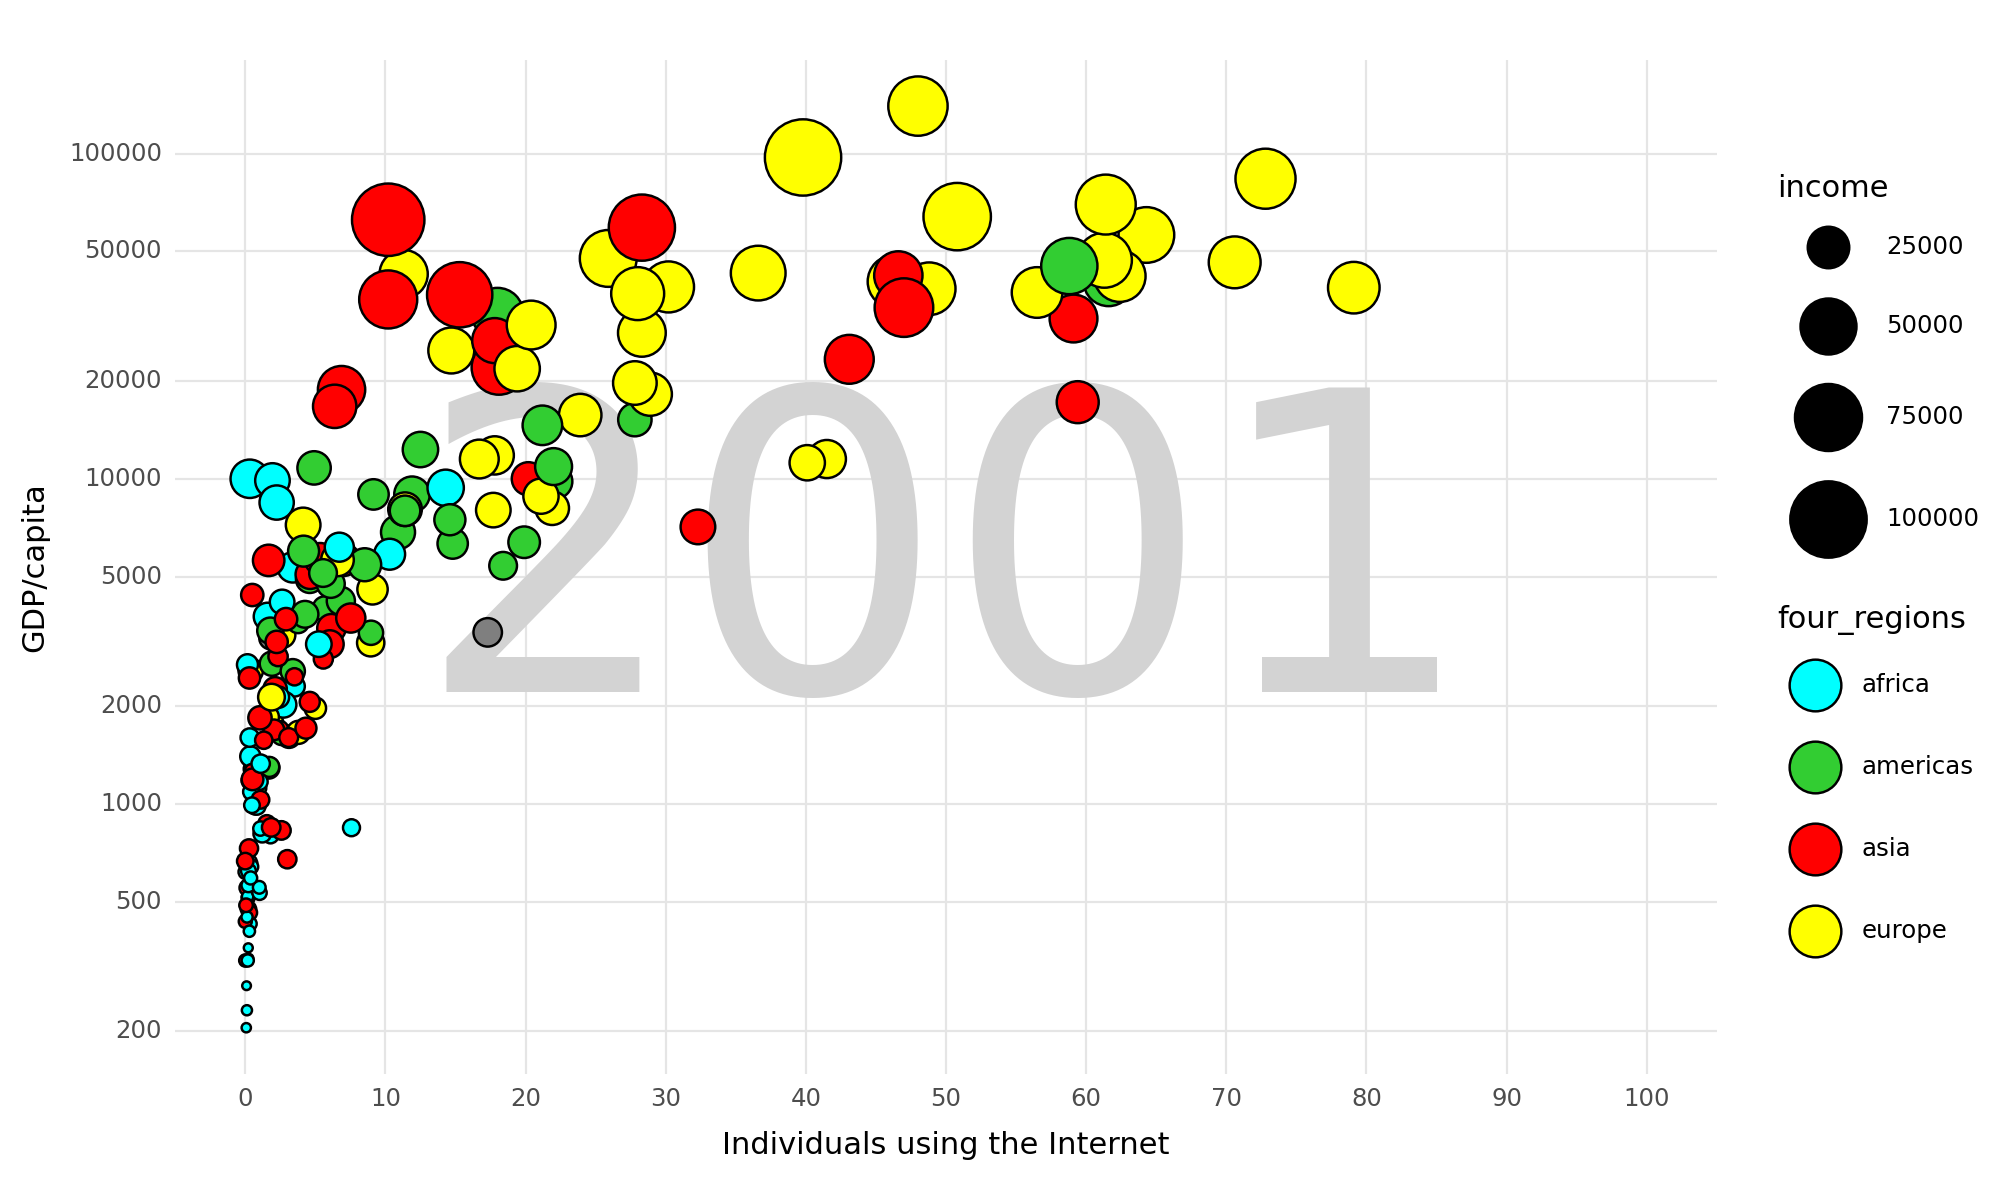

<Figure Size: (1000 x 600)>

In [90]:
#sources: for alpha: https://f0nzie.github.io/rmarkdown-python-plotnine/aesthetics-and-geometry.html
(ggplot(q3data, aes(x = 'internet_users', y = 'gdp', fill = "four_regions", size = 'income'))
+ annotate('text', x = 50, y = 5000, label = "2001", size = 150, color = 'lightgray')
+ geom_point()
+ labs(x = "Individuals using the Internet", y = "GDP/capita")
+ ylim(0, 200000)
+ scale_size_continuous(range = (1, 15))
+ scale_fill_manual(breaks = ('asia', 'europe', 'africa', 'americas'), values = ('red', 'yellow', 'aqua', 'limegreen'), guide=guide_legend(override_aes={'size': 10}))
+ scale_x_continuous(breaks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], limits = [0, 100])
+ scale_y_log10(breaks = (200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000))
+ theme_minimal()
+ theme(panel_grid_minor = element_blank(),
        figure_size = (10,6)
  )
)

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:284: PlotnineWarning: stat_density_2d : Removed 15 rows containing non-finite values.
/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


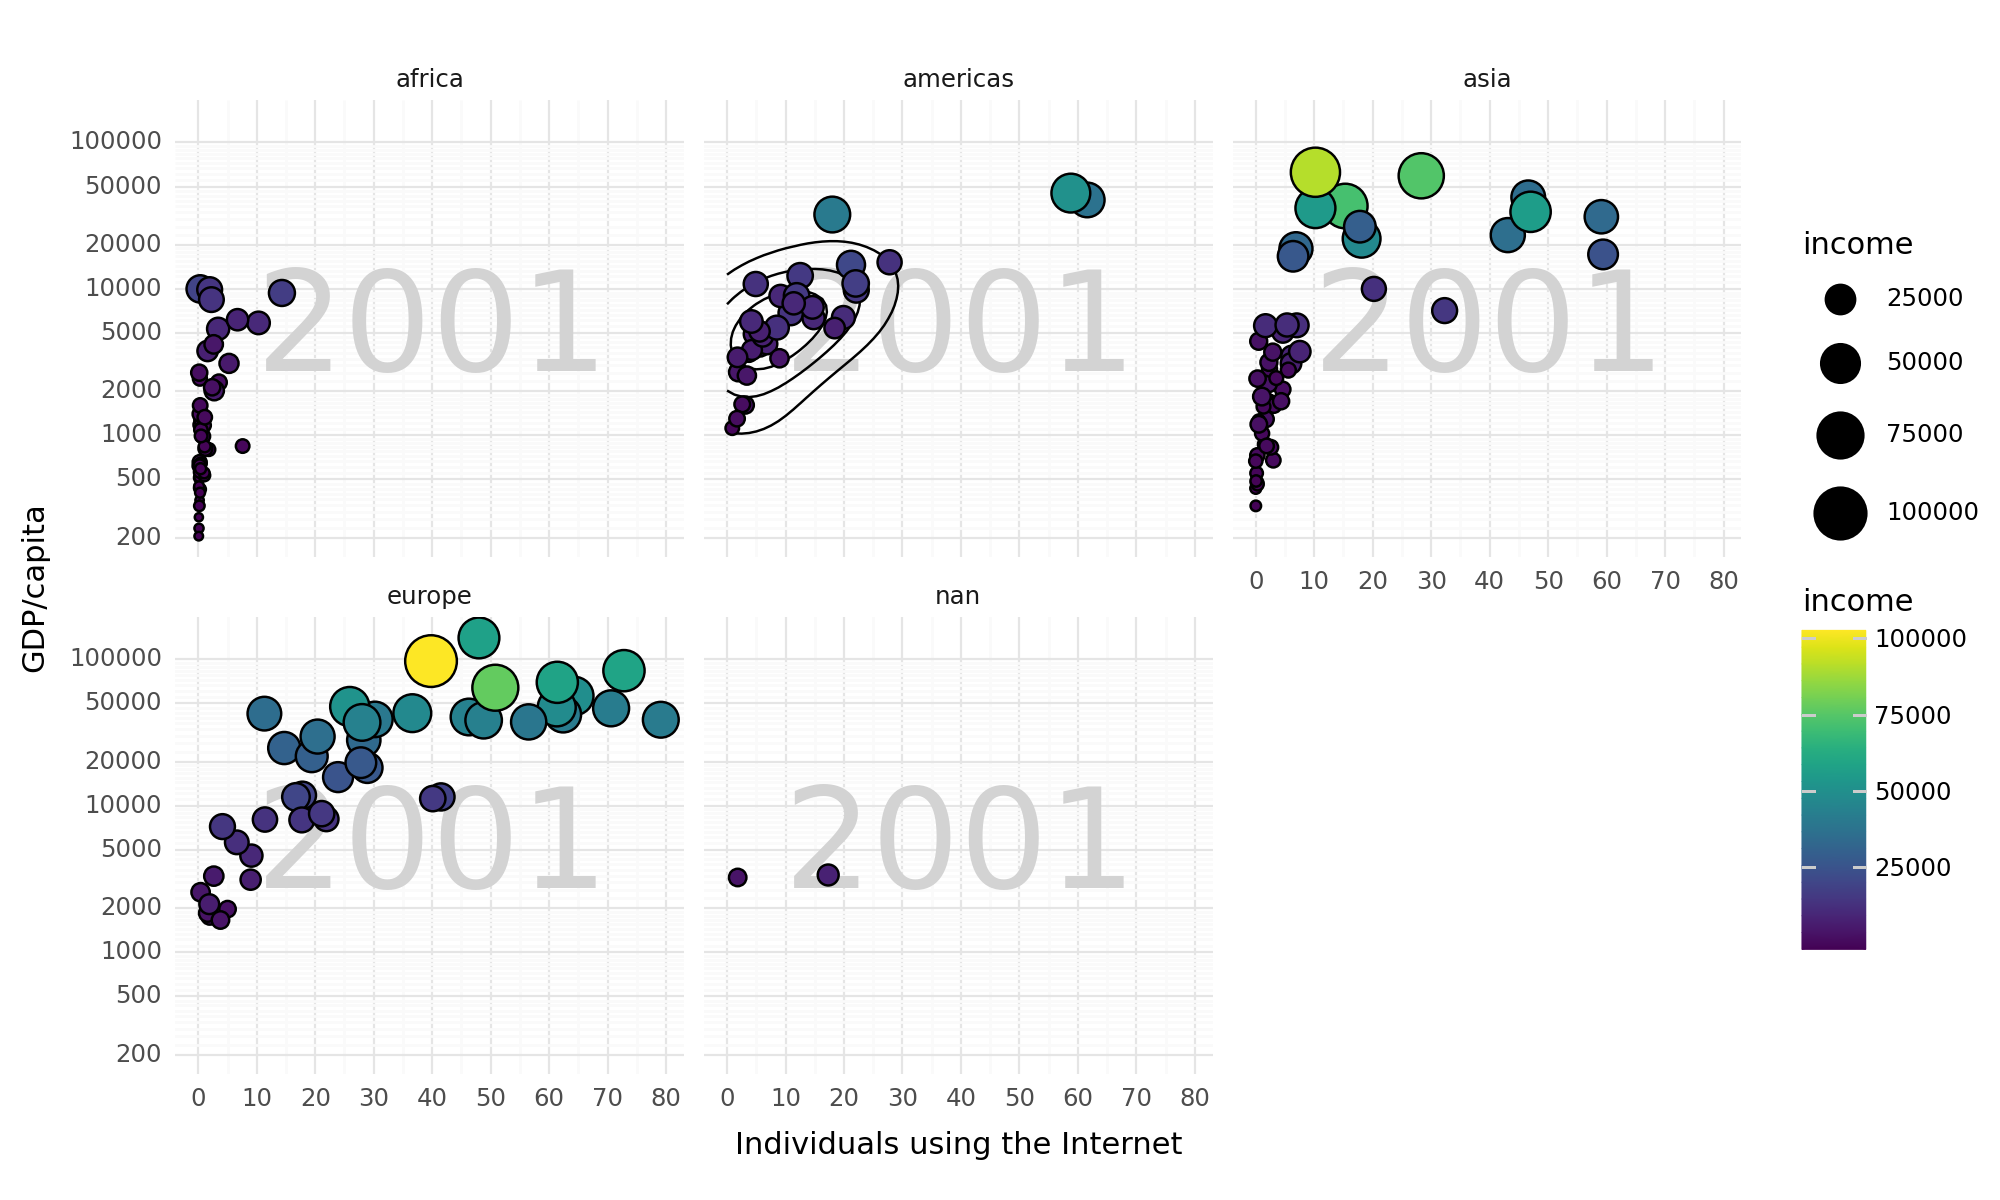

<Figure Size: (1000 x 600)>

In [91]:
#another geometry besides geom_point = 2D Density
#figure size source: https://stackoverflow.com/questions/46046908/ggplot-in-python-plot-size-and-color
(ggplot(q3data)
+ annotate('text', x = 40, y = 5000, label = "2001", size = 50, color = 'lightgray')
+ geom_density_2d(aes(x = 'internet_users', y = 'gdp'))
+ geom_point(q3data, aes(x = 'internet_users', y = 'gdp', size = 'income', fill = 'income'))
+ labs(x = "Individuals using the Internet", y = "GDP/capita")
+ scale_x_continuous(breaks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
+ scale_y_log10(breaks = (200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000))
+ scale_size_continuous(range = (1, 10))
+ facet_wrap('four_regions')
+ theme_minimal()
+ theme(figure_size = (10,6))
)

In this 2d density plot, each country has been facet_wrap based on what world region they are in. This makes it very easy to see the relationship between number of individuals using the internet and GDP/capita for each country per region. Although the original bubble map puts all of the countries together, it is a jumbled together, and it makes it very hard to read. The facet wrap and contouring from the 2d density plot makes it easy to compare the two variables' relationship and see how concentrated the countries are in the plot.